# Introduction to Scikit-learn

Scikit-learn (aka `sklearn`) is a general purpose machine-learning (ML) library. It has a reputation for being very versatile and user-friendly, hence its popularity.

## Loading the data

We'll start by loading the data we want to use, and for that we'll use `pandas` as it has good data loading/manipulation tools:

In [6]:
import pandas as pd

Let's then load the data we plan to use - its data on red wine, and stored in a comma separated value (`csv`) format. Others formats will work with pandas, with options listed here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [7]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url)

Let's have a quick look at the data before we start:

In [8]:
print(data.head())

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

Now this looks like a mess, and that is because it is! In this case we need to tell pandas that the data is separated by semi-colons (;) instead of commas (,)

In [9]:
data = pd.read_csv(dataset_url, sep=';')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Verifying and exploring the dataset

We can get some information on the quantity of data (1599 rows of samples, 12 columns of features) and the statistics of each feature (i.e. column) thus:

In [10]:
print(data.shape)

(1599, 12)


In [11]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The data in this file is all numerical, which is good, but runs over some very different scales - the mean varies between 46.4 and 0.27! - so we will need to standardise the data when we start to fit, otherwise some features will be more strongly weighted than others. Note here that you can look at specific sets of the data by using:

In [12]:
data['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

To confirm the quality of the dataset, we can check for gaps also:

In [13]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Having a complete dataset makes life much easier, as we don't have to think about handling the blanks in our dataset.

### Plotting data

We can go a bit further and plot parts of the data to give use some ideas of what we have. Let's start with a simple histogram of, for which we'll use the powerful `matplotlib`:

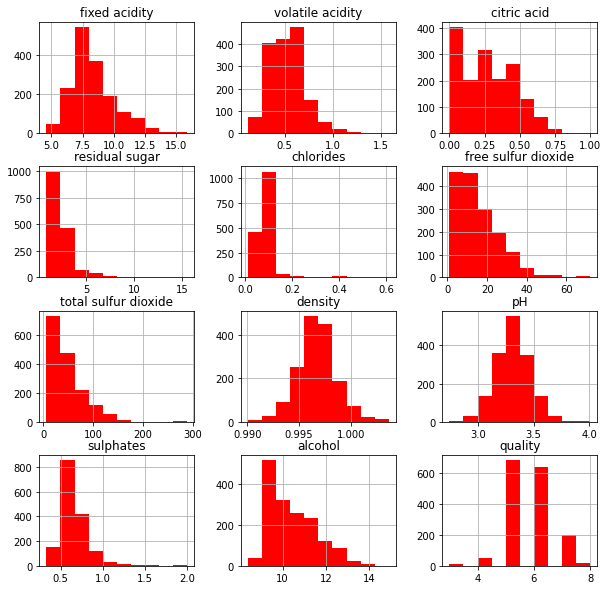

In [14]:
import matplotlib.pyplot as plt

data.hist(figsize=(10,10), color='red')
plt.show()

There is lots of flexibility with matplotlib so let's not get lost in the here; I suggest you review the matplotlib notebook. An important note though is quality is clearly not continuous - there are gaps in the histogram - indicuating that this is a subjective measure, and therefore an observable dependent on all other features in the context of this study. 

We can look for general trends of quality against other observables using standard two-axis plots:

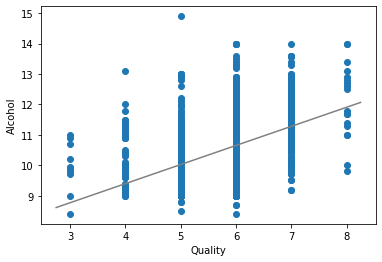

In [15]:
# Plot data
plt.scatter(data['quality'], data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')

# Plot a line of best fit
import numpy as np
m, c = np.polyfit(data['quality'], data['alcohol'], 1)
x = np.array(plt.gca().get_xlim())
plt.plot(x, m*x + c, color='grey')

plt.show()

So interestingly this tells us that quality improves with alcohol content - read into that as you will! 

Whilst working with producing these graphs, I came across the nice features of seaborn for data analysis. Graphs are easy to produce (compare the simple script below with the matplotlib examples), and lines of best fit for this are slightly more aesthetic as they can include e.g. confidence intervals, here plotted so we are 100% confident the mean of each `quality` value is within the shaded area around the line of best fit:



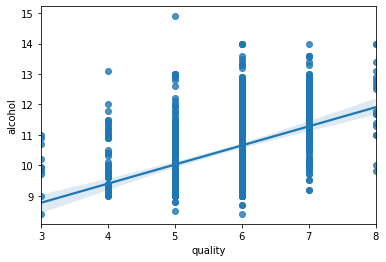

In [16]:
import seaborn as sns

sns.regplot(x="quality", y="alcohol", data=data, ci=100)
plt.show()

However, one of the more powerful tools available from seaborn is to visualise a correlation plot of the data - this will already give us hints on how features are related to each other:

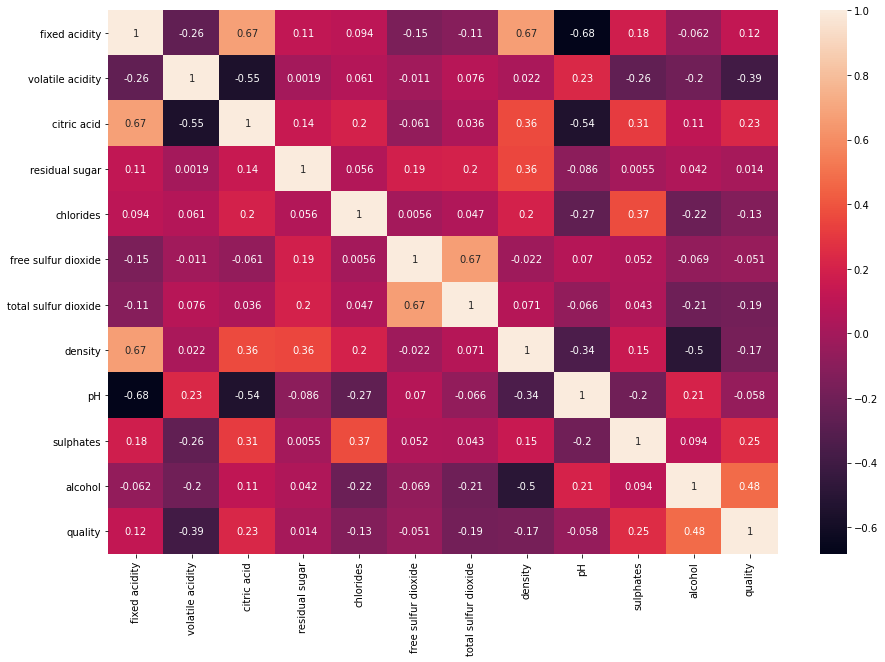

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Creating a ML model

It's great that we can review the data, but actually what we want to do is try to make some predictions, so lets get going with `sklearn`. 

Firstly, we need to split that data into features (X values) and observables (Y values), as well as splitting the data into training and testing groups; the former for making our model, and the latter for making sure it is valid:

In [18]:
y = data.quality
x = data.drop('quality', axis=1) # Removes quality from data, provides all other features

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

Here we've picked `quality` as our target value. As this is non-continuous, our type of ML will be a "classifier" rather than "regressor" (the latter is more suited to continuous data). More on this below.

The data splitting process provides us with x and y datasets with 80% in the training process and 20% stored for testing. Stratify ensures that the data spread in the test set matches the training set, which is better for model accuracy.

Next we must consider the key process of data standardisation, as the mean and standard deviations vary wildly in each feature (Remember our means range from 0.2 to 46!). Standardisation effectively subtracts the mean and divides by the standard deviation, and can be done with tools from `sklearn`:

In [19]:
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
print(x_train_scaled)

[[ 0.51358886  2.19680282 -0.164433   ...  1.08415147 -0.69866131
  -0.58608178]
 [-1.73698885 -0.31792985 -0.82867679 ...  1.46964764  1.2491516
   2.97009781]
 [-0.35201795  0.46443143 -0.47100705 ... -0.13658641 -0.35492962
  -0.20843439]
 ...
 [-0.98679628  1.10708533 -0.93086814 ...  0.24890976 -0.98510439
   0.35803669]
 [-0.69826067  0.46443143 -1.28853787 ...  1.08415147 -0.35492962
  -0.68049363]
 [ 3.1104093  -0.62528606  2.08377675 ... -1.61432173  0.79084268
  -0.39725809]]


Perhaps the easiest way to verify the data is scaled appropriately is to check the mean:

In [20]:
print(x_train_scaled.mean(axis=0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]


And we'll see the mean is effectively zero! Great - *but* - there is an issue in that this transformation will be different for each dataset we ever create, as each set will have different means and standard deviation. Not good.

The solution to this is, instead of scaling the data, create a model for the transformation of the training set and apply that evenly to all data sets:

In [21]:
scaler = preprocessing.StandardScaler().fit(x_train)
# and now transform the data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

This is nice as it means the *same* mean and standard deviation is used in scaling all data.

Now we are going to go one step further and create a `pipeline` for fitting our ML models. This is effectively the part where we start using ML, and there are lots of different models that can be used. A pipeline is a process sequence we can use repeatedly on datasets, which is good if we want to rigorously test the data model later on. One can just scale the data and fit a model without a `pipeline`, but hopefully the benefits will become clear as we go on.

To construct a pipeline for scaling and fitting, we need to load appropriate modules. Here we have used the `RandomForestClassifier`, remembering that we are performing "classification" of quality, and partly because the Random Forest is reportedly good for small datasets in chemistry. There are lots of models available (See for supervised learning: https://scikit-learn.org/stable/supervised_learning.html) and so it is strongly suggested that you test and compare different ML models to ensure optimum validity.

In [22]:
# 5. Declare data preprocessing steps
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier())

Note here that we have just given the `StandardScaler()` to the pipeline, and the `RandomForestClassifier` is provided with a default setting of 100 trees in the "forest".

Within the ML models, there are a range of "hyperparameters" that can be tuned to maximise accuracy: *model parameters* are learnt from the data, and *hyperparameters* are internal settings for the algorithm that the user must set as the computer doesn't know what's best!

We can list the hyperparameters in any model thus (with all the details given on the relevant API page: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) :

In [23]:
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestclassifier', RandomForestClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__ccp_alpha': 0.0, 'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__max_samples': None, 'randomforestclassifier__min_impurity_decrease': 0.0, 'randomforestclassifier__min_impurity_split': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__n_estimators': 100, 'randomfores

If there are variables that we don't know what the best setting is for, we can test these through cross-validation (i.e. test all and compare the outcomes). Lets test the best settings for deciding the maximum features and the forest depth by constructing a dictionary of the settings we want to try:

In [24]:
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestclassifier__max_depth': [None, 5, 3, 1]}

Great - we are now finally at the point where we can produce our ML model - but we should now explain cross-validation.

Cross-validation again ensures we maximise the accuracy of our results by building and testing a model multiple times. The easiest way to think of it is taking your training data, splitting it into 10 equal parts, training on 9/10 of these and testing on the remaining 1/10, then repeating with a different combination of 9/10 and testing ... and so on across a grid. At the end, the performance is aggregated, so you get an average of the ML model validity.

Cross-validation is really important because you cannot *a priori* know what is the e.g. best depth `max_depth` for your `RandomForestRegresssor`, and any user-led choice introduces bias. It also means the test data is untainted, mean you can train many different models and compare outcomes.

In [25]:
# 7. Tune model using cross-validation pipeline
from sklearn.model_selection import GridSearchCV
gridRF = GridSearchCV(pipeline, hyperparameters, cv=10)

After all that explanation, you can see that the actual cross-validation is very easy to implement. Here, `cv=10` means we are splitting our test data into 10 groups for cross-validation.

Now we can train and cross-validate our ML model:

In [26]:
gridRF.fit(x_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 5, 3, 1],
                         'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt',
                                                                  'log2']})

Once complete, we can see what are the best hyperparameters with:

In [27]:
print(gridRF.best_params_)

{'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'log2'}


*Note: RandomForests don't often need much tuning! But it's no harm to check!*

Once complete, it is best practice to refit the model with the best hyperparameters. Fortunately, `GridSearchCV` does this by default, though it can be confirmed with:

In [28]:
print(gridRF.refit)

True


Now, in the final stages, we can use our ML model to make predictions, through the `gridRF` object.

To make predictions, use the `gridRF` object like a normal ML model, i.e. pass in the feature data and collect the predictions:

In [29]:
# 9. Evaluate model pipeline on test data
pred = gridRF.predict(x_test)

All that remains is to check the accuracy of the model. In the first instance we can see how many of the predictions match the actual results and turning this into a percentage:

In [30]:
accuracy = (y_test == pred.astype(int)).value_counts()
print(accuracy)

True     223
False     97
Name: quality, dtype: int64


Note we had to convect "pred" into an `int` format so it is directly comparable to the testing results. The fit looks quite bad here - only 50% accuracy - but lets interrogage this with statistical methods imported from the sklearn modules:

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2: ", r2_score(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))

R2:  0.355893213874932
MSE:  0.415625


So now we see the mean error is small, implying that the inaccuracy in quality is due to rounding errors and the overall model is reasonable. Finally lets use a classification report:

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.astype(int)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.83      0.78       136
           6       0.65      0.75      0.70       128
           7       0.67      0.35      0.46        40
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.34      0.32      0.32       320
weighted avg       0.66      0.70      0.67       320



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The columns here tell you:
- `precision` of the model in getting the correct answer, positive or negative.
- `accuracy` in getting the positive values correct.
- `f1-score` is then then the weighted mean of `precision` and `accuracy`
- finally, `support` is the spread of the original dataset.

Job well done... though the accuracy can be improved! Try some different regression models to see whether this accuracy is appropriate. We'll compare models in another notebook.